In [1]:
import new_pipe
import has_violation
import pandas as pd

import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot

In [2]:
# this is the features dataframe
features_df = pd.read_csv("feature_df.csv")

In [3]:
features_df.shape

(98008, 39)

In [ ]:
# features_df = new_pipe.add_acs_features(df)

In [4]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98008 entries, 0 to 98007
Data columns (total 39 columns):
Unnamed: 0                            98008 non-null int64
sum_evalSTATE_CODE                    98008 non-null float64
other alone                           98008 non-null float64
population                            98008 non-null float64
p5top99                               98008 non-null float64
1p25to1p49_y                          98008 non-null float64
last early  ID_NUMBER                 98008 non-null float64
1to1p24_y                             98008 non-null float64
last late  ID_NUMBER                  98008 non-null float64
sum_evalID_NUMBER                     98008 non-null float64
NumInMyState                          98008 non-null float64
NumInMyZIP                            98008 non-null float64
two or more                           98008 non-null float64
early  ID_NUMBER count                98008 non-null float64
two or more some other                9

In [5]:
import epa_pipeline as ep

In [6]:
preds = pd.read_csv("dave_predictions.csv")

In [7]:
preds.shape

(98008, 18)

In [20]:
preds_trim = preds.iloc[:,0:5]

In [21]:
preds_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98008 entries, 0 to 98007
Data columns (total 5 columns):
Unnamed: 0                                                                                                              98008 non-null int64
RF{'max_depth': 100, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 10000, 'n_jobs': -1}_at_0.2pct     98008 non-null int64
RF{'max_depth': 100, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10000, 'n_jobs': -1}_at_0.2pct    98008 non-null int64
RF{'max_depth': 100, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 10000, 'n_jobs': -1}_at_0.2pct     98008 non-null int64
RF{'max_depth': 100, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10000, 'n_jobs': -1}_at_0.2pct    98008 non-null int64
dtypes: int64(5)
memory usage: 3.7 MB


In [22]:
preds_all = preds_trim.merge(features_df, left_index=True, right_index=True)

In [57]:
preds_truth = preds["truth"]

In [23]:
preds_all.shape

(98008, 44)

In [24]:
preds_all.shape

(98008, 44)

In [25]:
preds_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98008 entries, 0 to 98007
Data columns (total 44 columns):
Unnamed: 0_x                                                                                                            98008 non-null int64
RF{'max_depth': 100, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 10000, 'n_jobs': -1}_at_0.2pct     98008 non-null int64
RF{'max_depth': 100, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10000, 'n_jobs': -1}_at_0.2pct    98008 non-null int64
RF{'max_depth': 100, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 10000, 'n_jobs': -1}_at_0.2pct     98008 non-null int64
RF{'max_depth': 100, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10000, 'n_jobs': -1}_at_0.2pct    98008 non-null int64
Unnamed: 0_y                                                                                                            98008 non-null int64
sum_evalSTATE_CODE                           

In [26]:
import numpy as np

In [27]:
def aequitas_prep(df, q):
    # Column names = families_under_poverty_line, median income
    # df["families_under_pl_quartile"] = df["families_under_poverty_line"].quantile([0, .25, .5, .75, 1])
    # df["median_income_quartile"] = df["median income"].quantile([0, .25, .5, .75, 1])  # ([0, 25000, 50000, 100000, 150000])
    # for _, col in enumerate(["median income"]): #, "families_under_poverty_line"]):
        # col_q = col + '_q{}'.format(q)
        # df[col_q] = pd.cut(x=df["median income"],bins=q, labels=False) # pd.qcut(df[col], q, labels=False)
        # TODO: make these into equal buckets
    buckets = np.linspace(df["median income"].min(), df["median income"].max(), num=q)
    df["median_income_quantile"] = pd.cut(df["median income"], buckets)
    df["median_income_quantile"] = df["median_income_quantile"].astype(str)
    
    # white alone, black alone, native alone, asian alone, pacific alone, other alone, two or more
    df["race_majority"] = df[['white alone', 'black alone', 'native alone', 'asian alone', 'pacific alone',
                              'other alone', 'two or more']].idxmax(axis=1)
    return df

In [46]:
preds_all_prepped = aequitas_prep(preds_all,5)

In [47]:
preds_all_prepped = preds_all_prepped.drop('Unnamed: 0_x', 1)# .columns

In [48]:
preds_all_prepped = preds_all_prepped.drop('Unnamed: 0_y', 1)

In [49]:
preds_all_prepped.columns

Index(['RF{'max_depth': 100, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 10000, 'n_jobs': -1}_at_0.2pct',
       'RF{'max_depth': 100, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10000, 'n_jobs': -1}_at_0.2pct',
       'RF{'max_depth': 100, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 10000, 'n_jobs': -1}_at_0.2pct',
       'RF{'max_depth': 100, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10000, 'n_jobs': -1}_at_0.2pct',
       'sum_evalSTATE_CODE', 'other alone', 'population', 'p5top99',
       '1p25to1p49_y', 'last early  ID_NUMBER', '1to1p24_y',
       'last late  ID_NUMBER', 'sum_evalID_NUMBER', 'NumInMyState',
       'NumInMyZIP', 'two or more', 'early  ID_NUMBER count',
       'two or more some other', '1p50to1p84', 'asian alone',
       'late  ID_NUMBER sum', 'sum_evalZIP_CODE', 'IsLQG', '2andver',
       'DAYS_SINCE_VIOLATIONS_IN_ID_NUMBER', 'late  ID_NUMBER count',
       'lastSTATE_CODE', 'Unname

In [59]:
preds_all_prepped = preds_all_prepped.merge(preds_truth, right_index=True, left_index=True)

In [60]:
df_for_equity = preds_all_prepped.filter(["RF{'max_depth': 100, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 10000, 'n_jobs': -1}_at_0.2pct", "truth", "median_income_quantile", "race_majority"])




In [61]:
df_for_equity.rename(columns={"RF{'max_depth': 100, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 10000, 'n_jobs': -1}_at_0.2pct":'score', "truth":'label_value'},inplace=True)


In [62]:
df_for_equity.shape

(98008, 4)

In [63]:
df_for_equity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98008 entries, 0 to 98007
Data columns (total 4 columns):
score                     98008 non-null int64
label_value               98008 non-null float64
median_income_quantile    98008 non-null object
race_majority             98008 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 3.0+ MB


In [64]:
rf_for_aequitas = df_for_equity.copy(deep=True)

In [65]:
rf_for_aequitas["label_value"] = rf_for_aequitas["label_value"].astype(int)

In [66]:
g = Group()
import aequitas.preprocessing as ap

In [ ]:
# rf_for_aequitas_ready, lst = ap.preprocess_input_df(rf_for_aequitas)

In [ ]:
# rf_for_aequitas_ready.info()

In [68]:
xtab, _ = g.get_crosstabs(rf_for_aequitas)

model_id, score_thresholds 1 {'rank_abs': [19603]}


In [69]:
absolute_metrics = g.list_absolute_metrics(xtab)

In [70]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,1,binary 0/1,19603,median_income_quantile,"(0.0, 62500.25]",12874,57052,11086,1808,55244,1788,3596,66330,69926,98008
1,1,binary 0/1,19603,median_income_quantile,"(125000.5, 187500.75]",361,672,340,16,656,21,37,996,1033,98008
2,1,binary 0/1,19603,median_income_quantile,"(187500.75, 250001.0]",43,26,40,1,25,3,4,65,69,98008
3,1,binary 0/1,19603,median_income_quantile,"(62500.25, 125000.5]",4747,18612,4154,611,18001,593,1204,22155,23359,98008
4,1,binary 0/1,19603,median_income_quantile,nan,1578,2043,1351,60,1983,227,287,3334,3621,98008
5,1,binary 0/1,19603,race_majority,asian alone,390,143,341,5,138,49,54,479,533,98008
6,1,binary 0/1,19603,race_majority,black alone,1814,4547,1587,141,4406,227,368,5993,6361,98008
7,1,binary 0/1,19603,race_majority,native alone,236,297,216,2,295,20,22,511,533,98008
8,1,binary 0/1,19603,race_majority,other alone,214,126,189,4,122,25,29,311,340,98008
9,1,binary 0/1,19603,race_majority,pacific alone,2,0,2,0,0,0,0,2,2,98008


In [71]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,median_income_quantile,"(0.0, 62500.25]",0.50,0.83,0.03,0.86,0.17,0.50,0.97,0.14,0.66,0.18,0.05
1,median_income_quantile,"(125000.5, 187500.75]",0.57,0.66,0.02,0.94,0.34,0.43,0.98,0.06,0.02,0.35,0.04
2,median_income_quantile,"(187500.75, 250001.0]",0.75,0.38,0.04,0.93,0.62,0.25,0.96,0.07,0.00,0.62,0.06
3,median_income_quantile,"(62500.25, 125000.5]",0.49,0.81,0.03,0.88,0.19,0.51,0.97,0.12,0.24,0.20,0.05
4,median_income_quantile,nan,0.79,0.59,0.03,0.86,0.41,0.21,0.97,0.14,0.08,0.44,0.08
5,race_majority,asian alone,0.91,0.29,0.03,0.87,0.71,0.09,0.97,0.13,0.02,0.73,0.10
6,race_majority,black alone,0.62,0.74,0.03,0.87,0.26,0.38,0.97,0.13,0.09,0.29,0.06
7,race_majority,native alone,0.91,0.58,0.01,0.92,0.42,0.09,0.99,0.08,0.01,0.44,0.04
8,race_majority,other alone,0.86,0.39,0.03,0.88,0.61,0.14,0.97,0.12,0.01,0.63,0.09
9,race_majority,pacific alone,NaN,0.00,NaN,1.00,1.00,NaN,NaN,0.00,0.00,1.00,0.00


In [72]:
aqp = Plot()

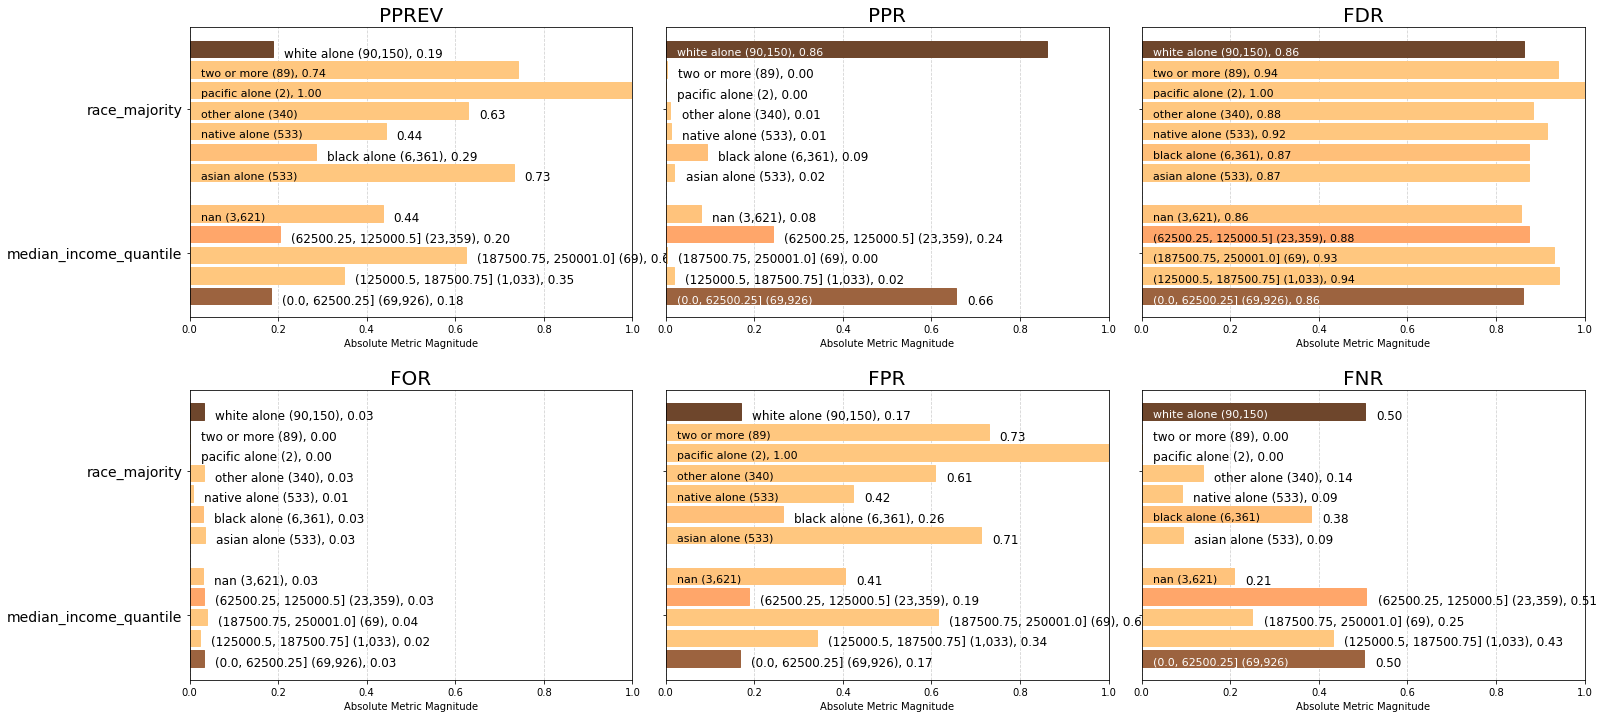

In [73]:
p = aqp.plot_group_metric_all(xtab, ncols=3)

In [74]:
b = Bias()

In [78]:
bdf = b.get_disparity_predefined_groups(xtab, original_df=rf_for_aequitas, ref_groups_dict={'median_income_quantile':'(187500.75, 250001.0]', 'race_majority':'white alone'}, alpha=0.05, mask_significance=True)
bdf.style

get_disparity_predefined_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,1,binary 0/1,19603,median_income_quantile,"(0.0, 62500.25]",0.497219,0.832866,0.0316904,0.861115,0.167134,0.502781,0.96831,0.138885,12874,57052,0.656736,0.184109,11086,1808,55244,1788,3596,66330,69926,98008,0.0514258,299.395,0.295431,1.99068,0.925699,0.82395,0.271593,2.01112,0.662959,2.16545,1.00704,"(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]"
1,1,binary 0/1,19603,median_income_quantile,"(125000.5, 187500.75]",0.567568,0.658635,0.0238095,0.941828,0.341365,0.432432,0.97619,0.0581717,361,672,0.0184155,0.349468,340,16,656,21,37,996,1033,98008,0.035818,8.39535,0.560774,0.833795,1.01247,0.619048,0.554719,1.72973,0.756757,1.71245,1.01524,"(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]"
2,1,binary 0/1,19603,median_income_quantile,"(187500.75, 250001.0]",0.75,0.384615,0.0384615,0.930233,0.615385,0.25,0.961538,0.0697674,43,26,0.00219354,0.623188,40,1,25,3,4,65,69,98008,0.057971,1,1,1,1,1,1,1,1,1,1,"(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]"
3,1,binary 0/1,19603,median_income_quantile,"(62500.25, 125000.5]",0.492525,0.812503,0.0328283,0.875079,0.187497,0.507475,0.967172,0.124921,4747,18612,0.242157,0.203219,4154,611,18001,593,1204,22155,23359,98008,0.0515433,110.395,0.326096,1.79053,0.94071,0.853535,0.304683,2.0299,0.6567,2.11251,1.00586,"(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]"
4,1,binary 0/1,19603,median_income_quantile,nan,0.790941,0.594781,0.0293686,0.856147,0.405219,0.209059,0.970631,0.143853,1578,2043,0.0804979,0.435791,1351,60,1983,227,287,3334,3621,98008,0.0792599,36.6977,0.699293,2.06189,0.920358,0.763583,0.658481,0.836237,1.05459,1.54643,1.00946,"(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]"
5,1,binary 0/1,19603,race_majority,asian alone,0.907407,0.2881,0.034965,0.874359,0.7119,0.0925926,0.965035,0.125641,390,143,0.0198949,0.731707,341,5,138,49,54,479,533,98008,0.101313,0.0231029,3.90755,0.919352,1.01277,1.09294,4.17639,0.183724,1.82937,0.3473,0.996928,white alone,white alone,white alone,white alone,white alone,white alone,white alone,white alone,white alone,white alone
6,1,binary 0/1,19603,race_majority,black alone,0.616848,0.735191,0.0310095,0.874862,0.264809,0.383152,0.968991,0.125138,1814,4547,0.0925369,0.285175,1587,141,4406,227,368,5993,6361,98008,0.0578525,0.107458,1.52293,0.91567,1.01335,0.969297,1.55351,0.760256,1.24359,0.886262,1.00101,white alone,white alone,white alone,white alone,white alone,white alone,white alone,white alone,white alone,white alone
7,1,binary 0/1,19603,race_majority,native alone,0.909091,0.577299,0.0067340

In [79]:
calculated_disparities = b.list_disparities(bdf)
disparity_significance = b.list_significance(bdf)

In [80]:
bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,median_income_quantile,"(0.0, 62500.25]",299.395349,0.295431,1.990679,0.925699,0.823950,0.271593,2.011123,0.662959,2.165452,1.007042
1,median_income_quantile,"(125000.5, 187500.75]",8.395349,0.560774,0.833795,1.012465,0.619048,0.554719,1.729730,0.756757,1.712450,1.015238
2,median_income_quantile,"(187500.75, 250001.0]",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,median_income_quantile,"(62500.25, 125000.5]",110.395349,0.326096,1.790534,0.940710,0.853535,0.304683,2.029900,0.656700,2.112507,1.005859
4,median_income_quantile,nan,36.697674,0.699293,2.061893,0.920358,0.763583,0.658481,0.836237,1.054588,1.546431,1.009457
5,race_majority,asian alone,0.023103,3.907554,0.919352,1.012766,1.092941,4.176391,0.183724,1.829368,0.347300,0.996928
6,race_majority,black alone,0.107458,1.522928,0.915670,1.013349,0.969297,1.553513,0.760256,1.243589,0.886262,1.001015
7,race_majority,native alone,0.013980,2.364571,0.620110,1.060135,0.210492,2.479791,0.180383,1.832762,0.695926,1.026092
8,race_majority,other alone,0.012677,3.361262,0.854824,1.022981,0.992321,3.565198,0.273685,1.737964,0.472891,1.000254
9,race_majority,pacific alone,0.000118,5.340323,0.000000,1.158296,NaN,5.866543,NaN,NaN,0.000000,NaN


In [82]:
hbdf = b.get_disparity_predefined_groups(xtab, original_df=rf_for_aequitas, 
                                         ref_groups_dict={'median_income_quantile':'(187500.75, 250001.0]', 'race_majority':'white alone'},
                                         alpha=0.05,
                                         mask_significance=False)

get_disparity_predefined_group()


In [83]:
hbdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,median_income_quantile,"(0.0, 62500.25]",299.395349,0.295431,1.990679,0.925699,0.823950,0.271593,2.011123,0.662959,2.165452,1.007042
1,median_income_quantile,"(125000.5, 187500.75]",8.395349,0.560774,0.833795,1.012465,0.619048,0.554719,1.729730,0.756757,1.712450,1.015238
2,median_income_quantile,"(187500.75, 250001.0]",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,median_income_quantile,"(62500.25, 125000.5]",110.395349,0.326096,1.790534,0.940710,0.853535,0.304683,2.029900,0.656700,2.112507,1.005859
4,median_income_quantile,nan,36.697674,0.699293,2.061893,0.920358,0.763583,0.658481,0.836237,1.054588,1.546431,1.009457
5,race_majority,asian alone,0.023103,3.907554,0.919352,1.012766,1.092941,4.176391,0.183724,1.829368,0.347300,0.996928
6,race_majority,black alone,0.107458,1.522928,0.915670,1.013349,0.969297,1.553513,0.760256,1.243589,0.886262,1.001015
7,race_majority,native alone,0.013980,2.364571,0.620110,1.060135,0.210492,2.479791,0.180383,1.832762,0.695926,1.026092
8,race_majority,other alone,0.012677,3.361262,0.854824,1.022981,0.992321,3.565198,0.273685,1.737964,0.472891,1.000254
9,race_majority,pacific alone,0.000118,5.340323,0.000000,1.158296,NaN,5.866543,NaN,NaN,0.000000,NaN


In [85]:
majority_bdf = b.get_disparity_major_group(xtab, original_df=rf_for_aequitas, mask_significance=True)

get_disparity_major_group()


In [86]:
majority_bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,median_income_quantile,"(0.0, 62500.25]",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,median_income_quantile,"(125000.5, 187500.75]",0.028041,1.898157,0.418850,1.093731,0.751317,2.042465,0.860081,1.141484,0.790805,1.008139
2,median_income_quantile,"(187500.75, 250001.0]",0.003340,3.384890,0.502341,1.080265,1.213666,3.681983,0.497235,1.508389,0.461797,0.993007
3,median_income_quantile,"(62500.25, 125000.5]",0.368728,1.103799,0.899459,1.016216,1.035907,1.121837,1.009337,0.990559,0.975551,0.998825
4,median_income_quantile,nan,0.122573,2.367029,1.035774,0.994230,0.926735,2.424515,0.415806,1.590729,0.714138,1.002398
5,race_majority,asian alone,0.023103,3.907554,0.919352,1.012766,1.092941,4.176391,0.183724,1.829368,0.347300,0.996928
6,race_majority,black alone,0.107458,1.522928,0.915670,1.013349,0.969297,1.553513,0.760256,1.243589,0.886262,1.001015
7,race_majority,native alone,0.013980,2.364571,0.620110,1.060135,0.210492,2.479791,0.180383,1.832762,0.695926,1.026092
8,race_majority,other alone,0.012677,3.361262,0.854824,1.022981,0.992321,3.565198,0.273685,1.737964,0.472891,1.000254
9,race_majority,pacific alone,0.000118,5.340323,0.000000,1.158296,NaN,5.866543,NaN,NaN,0.000000,NaN


In [87]:
min_metric_bdf = b.get_disparity_min_metric(df=xtab, original_df=rf_for_aequitas)

get_disparity_min_metric()


In [88]:
min_metric_bdf.style

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,ppr_ref_group_value,pprev_disparity,pprev_ref_group_value,precision_disparity,precision_ref_group_value,fdr_disparity,fdr_ref_group_value,for_disparity,for_ref_group_value,fpr_disparity,fpr_ref_group_value,fnr_disparity,fnr_ref_group_value,tpr_disparity,tpr_ref_group_value,tnr_disparity,tnr_ref_group_value,npv_disparity,npv_ref_group_value
0,1,binary 0/1,19603,median_income_quantile,"(0.0, 62500.25]",0.497219,0.832866,0.0316904,0.861115,0.167134,0.502781,0.96831,0.138885,12874,57052,0.656736,0.184109,11086,1808,55244,1788,3596,66330,69926,98008,0.0514258,299.395,"(187500.75, 250001.0]",1,"(0.0, 62500.25]",2.38749,"(125000.5, 187500.75]",1.0058,nan,1.331,"(125000.5, 187500.75]",1,"(0.0, 62500.25]",2.40497,nan,1.00953,"(62500.25, 125000.5]",2.16545,"(187500.75, 250001.0]",1.00704,"(187500.75, 250001.0]"
1,1,binary 0/1,19603,median_income_quantile,"(125000.5, 187500.75]",0.567568,0.658635,0.0238095,0.941828,0.341365,0.432432,0.97619,0.0581717,361,672,0.0184155,0.349468,340,16,656,21,37,996,1033,98008,0.035818,8.39535,"(187500.75, 250001.0]",1.89816,"(0.0, 62500.25]",1,"(125000.5, 187500.75]",1.10008,nan,1,"(125000.5, 187500.75]",2.04247,"(0.0, 62500.25]",2.06847,nan,1.15236,"(62500.25, 125000.5]",1.71245,"(187500.75, 250001.0]",1.01524,"(187500.75, 250001.0]"
2,1,binary 0/1,19603,median_income_quantile,"(187500.75, 250001.0]",0.75,0.384615,0.0384615,0.930233,0.615385,0.25,0.961538,0.0697674,43,26,0.00219354,0.623188,40,1,25,3,4,65,69,98008,0.057971,1,"(187500.75, 250001.0]",3.38489,"(0.0, 62500.25]",1.19934,"(125000.5, 187500.75]",1.08653,nan,1.61538,"(125000.5, 187500.75]",3.68198,"(0.0, 62500.25]",1.19583,nan,1.52277,"(62500.25, 125000.5]",1,"(187500.75, 250001.0]",1,"(187500.75, 250001.0]"
3,1,binary 0/1,19603,median_income_quantile,"(62500.25, 125000.5]",0.492525,0.812503,0.0328283,0.875079,0.187497,0.507475,0.967172,0.124921,4747,18612,0.242157,0.203219,4154,611,18001,593,1204,22155,23359,98008,0.0515433,110.395,"(187500.75, 250001.0]",1.1038,"(0.0, 62500.25]",2.14745,"(125000.5, 187500.75]",1.02211,nan,1.37879,"(125000.5, 187500.75]",1.12184,"(0.0, 62500.25]",2.42742,nan,1,"(62500.25, 125000.5]",2.11251,"(187500.75, 250001.0]",1.00586,"(187500.75, 250001.0]"
4,1,binary 0/1,19603,median_income_quantile,nan,0.790941,0.594781,0.0293686,0.856147,0.405219,0.209059,0.970631,0.143853,1578,2043,0.0804979,0.435791,1351,60,1983,227,287,3334,3621,98008,0.0792599,36.6977,"(187500.75, 250001.0]",2.36703,"(0.0, 62500.25]",2.4729,"(125000.5, 187500.75]",1,nan,1.23348,"(125000.5, 187500.75]",2.42452,"(0.0, 62500.25]",1,nan,1.60589,"(62500.25, 125000.5]",1.54643,"(187500.75, 250001.0]",1.00946,"(187500.75, 250001.0]"
5,1,binary 0/1,19603,race_majority,asian alone,0.907407,0.2881,0.034965,0.874359,0.7119,0.0925926,0.965035,0.125641,390,143,0.0198949,0.731707,341,5,138,49,54,479,533,98008,0.101313,195,pacific alone,3.90755,white alone,10,pacific alone,1.01277,white alone,10,two or more,4.17639,white alone,10,two or more,1.82937,white alone,10,pacific alone,1,asian alone
6,1,binary 0/1,19603,race_majority,black alone,0.616848,0.735191,0.0310095,0.874862,0.264809,0.383152,0.968991,0.125138,1814,4547,0.0925369,0.285175,1587,141,4406,227,368,5993,6361,98008,0.0578525,907,pacific alone,1.52293,white alone,10,pacific alone,1.01335,white alone,10,two or more,1.55351,white alone,10,two or more,1.24359,white alone,10,pacific alone,1.0041,asian alone
7,1,binary 0/1,19603,race_majority,native alone,0.909091,0.577299,0.00673401,0.915254,0.422701,0.0909091,0.993266,0.0847458,236,297,0.012039,0.442777,216,2,295,20,22,511,533,98008,0.0412758,118,pacific alone,2.36457,white alone,10,pacific alone,1.06013,white alone,10,two or more,2.47979,white alone,10,two or more,1.83276,white alone,10,pacific alone,1.02925,asian alone
8,1,binary 0/1,19603,race_majority,othe

In [89]:
min_metric_bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,median_income_quantile,"(0.0, 62500.25]",299.395349,1.000000,2.387492,1.005803,1.330996,1.000000,2.404968,1.009531,2.165452,1.007042
1,median_income_quantile,"(125000.5, 187500.75]",8.395349,1.898157,1.000000,1.100078,1.000000,2.042465,2.068468,1.152363,1.712450,1.015238
2,median_income_quantile,"(187500.75, 250001.0]",1.000000,3.384890,1.199336,1.086534,1.615385,3.681983,1.195833,1.522766,1.000000,1.000000
3,median_income_quantile,"(62500.25, 125000.5]",110.395349,1.103799,2.147452,1.022113,1.378788,1.121837,2.427422,1.000000,2.112507,1.005859
4,median_income_quantile,nan,36.697674,2.367029,2.472901,1.000000,1.233480,2.424515,1.000000,1.605890,1.546431,1.009457
5,race_majority,asian alone,195.000000,3.907554,10.000000,1.012766,10.000000,4.176391,10.000000,1.829368,10.000000,1.000000
6,race_majority,black alone,907.000000,1.522928,10.000000,1.013349,10.000000,1.553513,10.000000,1.243589,10.000000,1.004099
7,race_majority,native alone,118.000000,2.364571,10.000000,1.060135,10.000000,2.479791,10.000000,1.832762,10.000000,1.029254
8,race_majority,other alone,107.000000,3.361262,10.000000,1.022981,10.000000,3.565198,10.000000,1.737964,10.000000,1.003336
9,race_majority,pacific alone,1.000000,5.340323,NaN,1.158296,NaN,5.866543,NaN,NaN,NaN,NaN


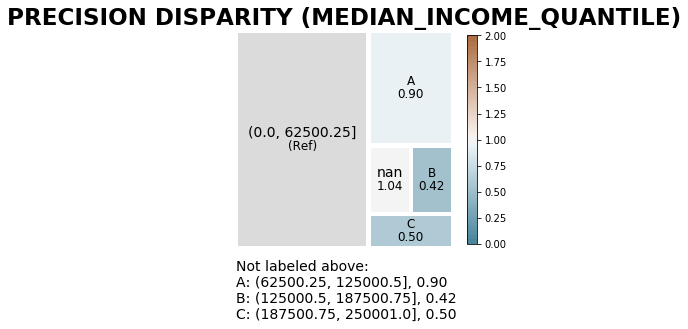

In [96]:
aqp.plot_disparity(majority_bdf, group_metric='precision_disparity', attribute_name='median_income_quantile', significance_alpha=0.05)


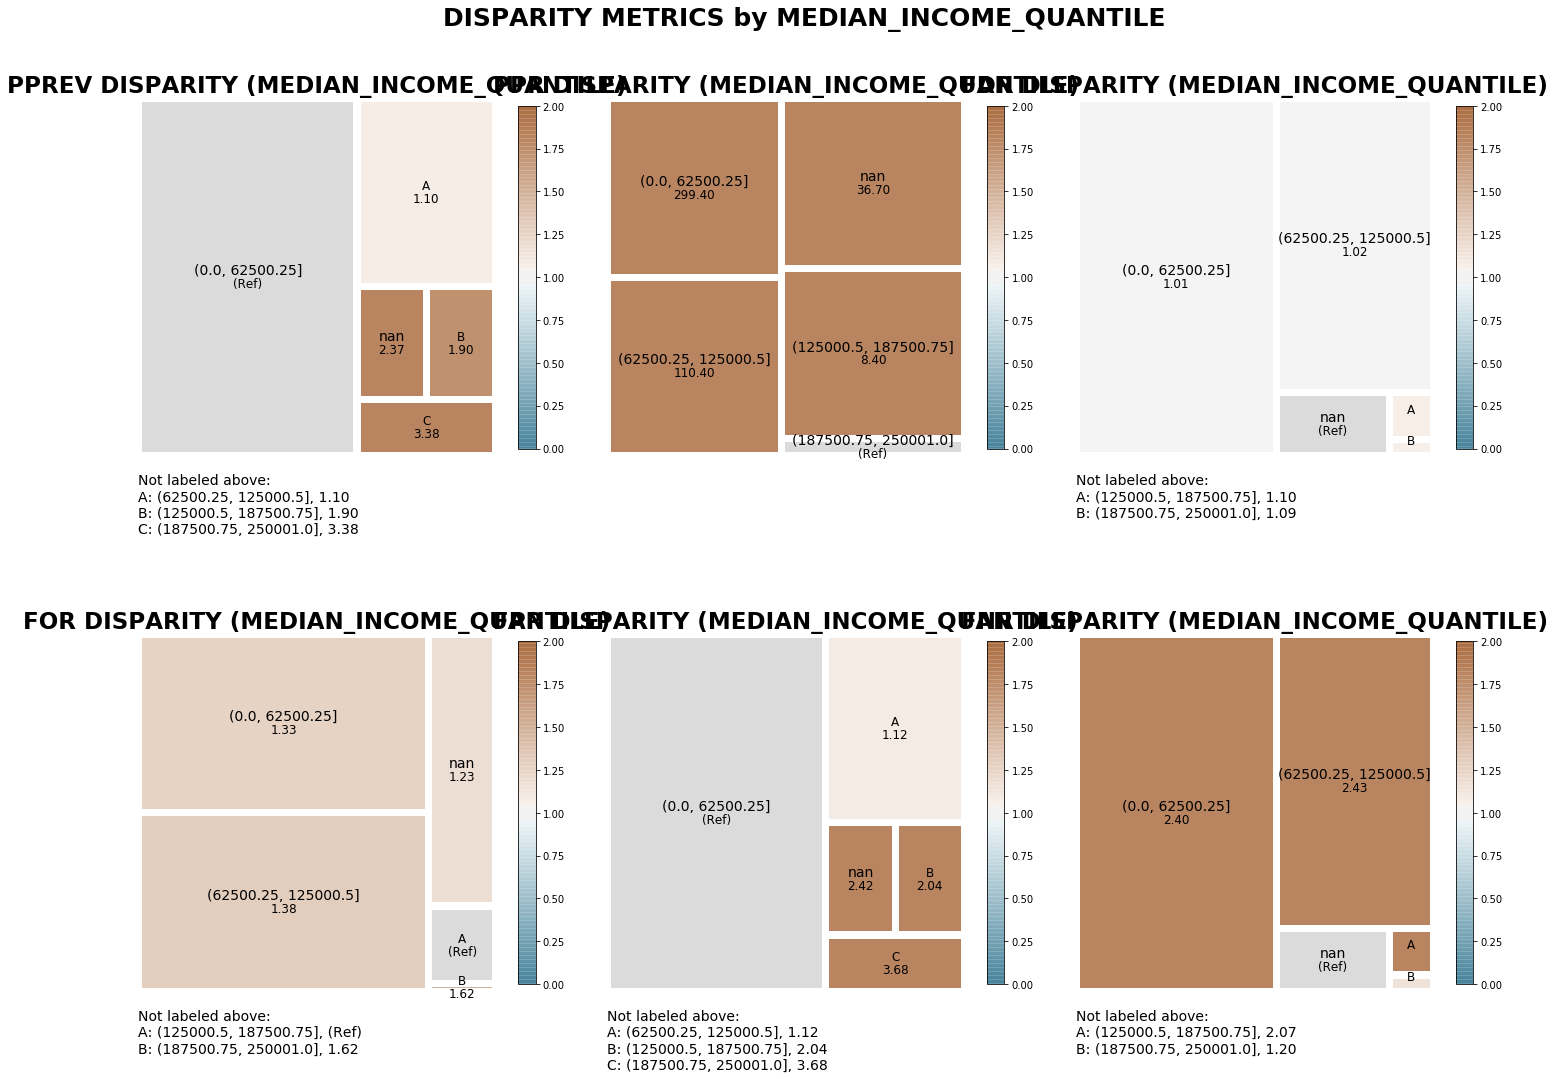

In [98]:
min_met = aqp.plot_disparity_all(min_metric_bdf, attributes=['median_income_quantile'], significance_alpha=0.05)

In [ ]:
min_met = aqp.plot_disparity_all(min_metric_bdf, attributes=['families_under_poverty_line'], significance_alpha=0.05)

In [ ]:
min_met = aqp.plot_disparity_all(min_metric_bdf, attributes=['black alone'], significance_alpha=0.05)

In [ ]:
min_met = aqp.plot_disparity_all(min_metric_bdf, attributes=['native alone'], significance_alpha=0.05)

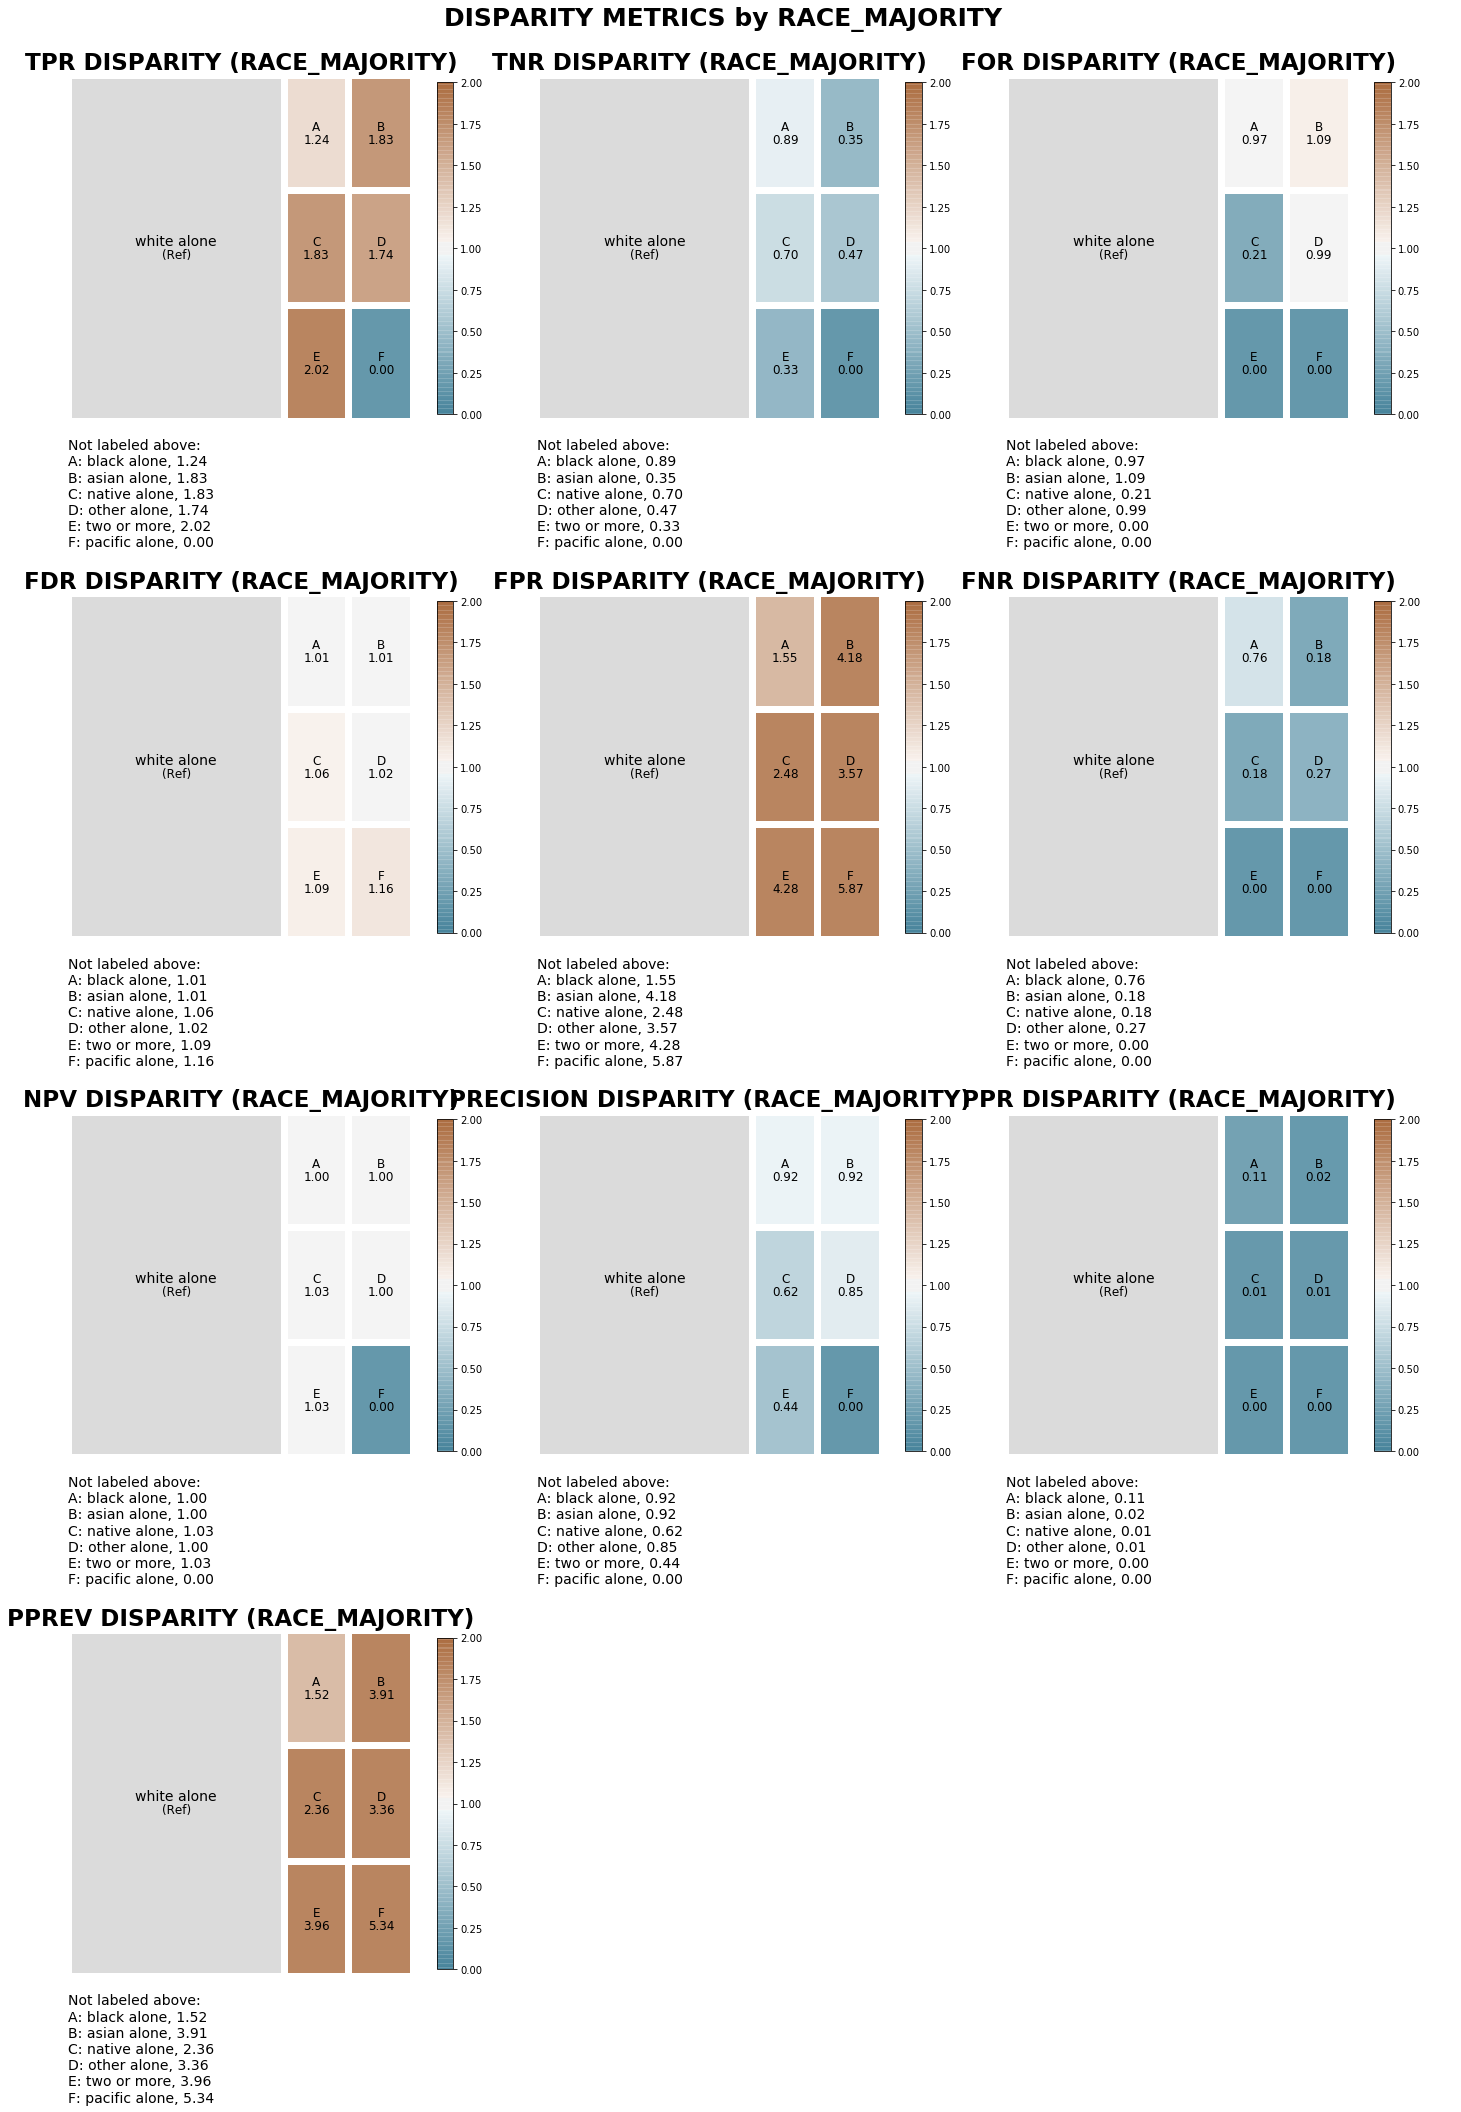

In [99]:
tm_capped = aqp.plot_disparity_all(hbdf, attributes=['race_majority'], metrics = 'all', significance_alpha=0.05)

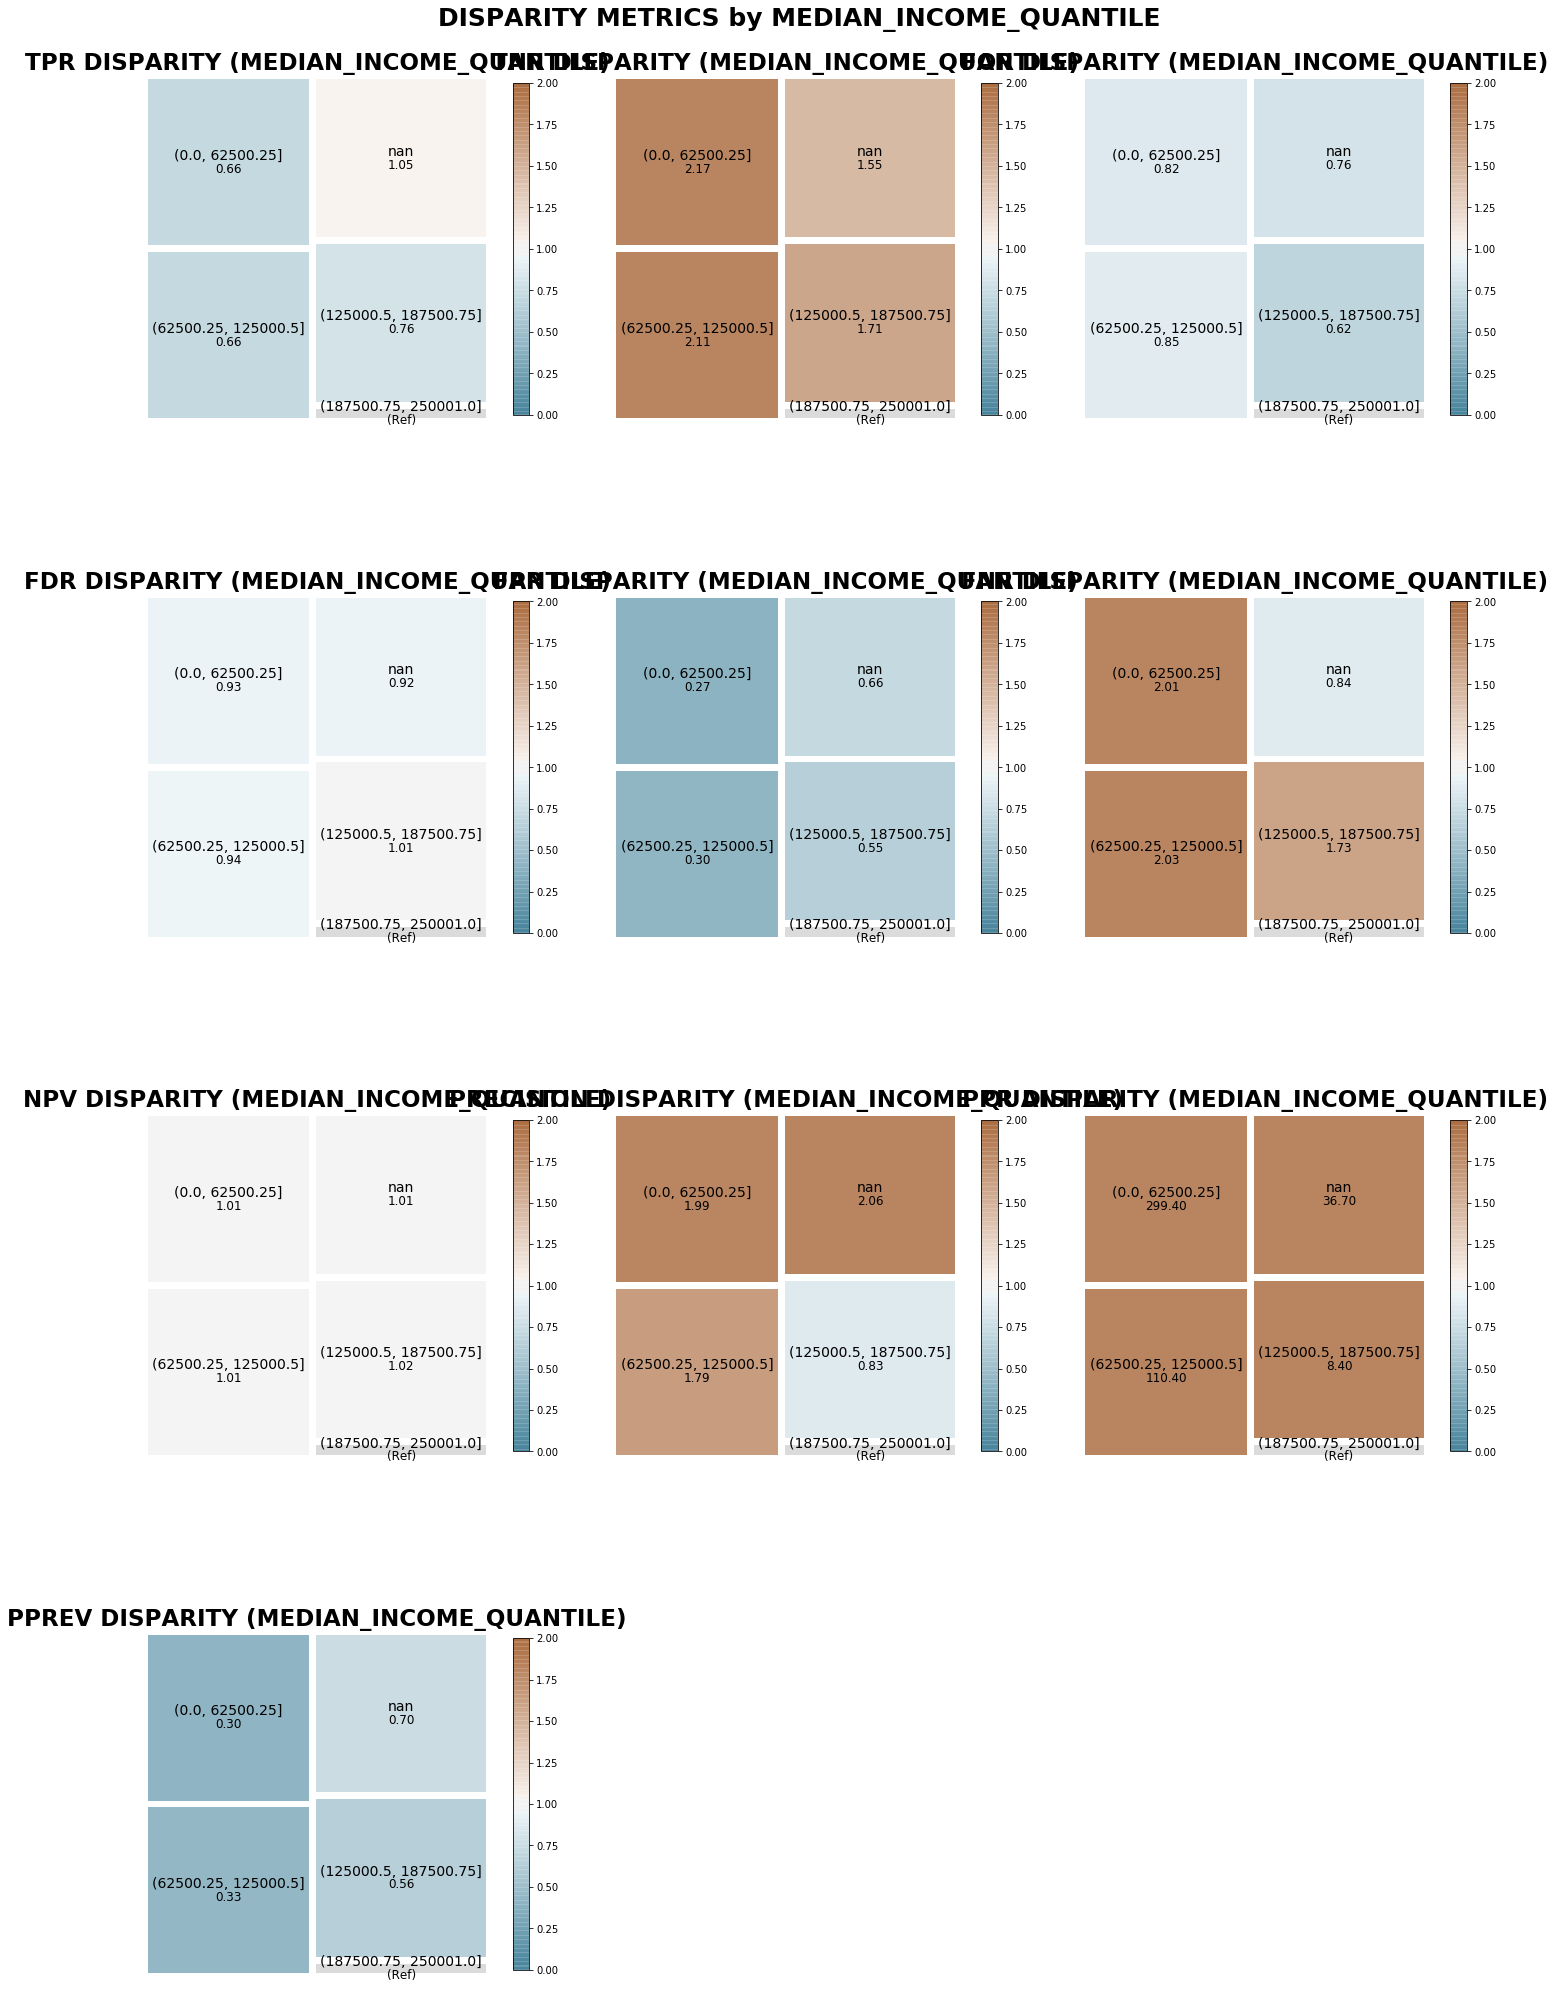

In [104]:
by_income = aqp.plot_disparity_all(hbdf, attributes=['median_income_quantile'], metrics = 'all', significance_alpha=0.05)

In [ ]:
dp = aqp.plot_disparity_all(majority_bdf, metrics=['for_disparity', 'fpr_disparity'], significance_alpha=0.05)

In [100]:
f = Fairness()
fdf = f.get_group_value_fairness(bdf)

In [101]:
parity_detrminations = f.list_parities(fdf)

In [102]:
fdf[['attribute_name', 'attribute_value'] + absolute_metrics + calculated_disparities + parity_detrminations].style

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,NPV Parity,TypeI Parity,Supervised Fairness,FPR Parity,TypeII Parity,FDR Parity,TPR Parity,Impact Parity,Equalized Odds,Unsupervised Fairness,FOR Parity,TNR Parity,FNR Parity,Statistical Parity,Precision Parity
0,median_income_quantile,"(0.0, 62500.25]",0.497219,0.832866,0.0316904,0.861115,0.167134,0.502781,0.96831,0.138885,0.656736,0.184109,0.0514258,299.395,0.295431,1.99068,0.925699,0.82395,0.271593,2.01112,0.662959,2.16545,1.00704,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False
1,median_income_quantile,"(125000.5, 187500.75]",0.567568,0.658635,0.0238095,0.941828,0.341365,0.432432,0.97619,0.0581717,0.0184155,0.349468,0.035818,8.39535,0.560774,0.833795,1.01247,0.619048,0.554719,1.72973,0.756757,1.71245,1.01524,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True
2,median_income_quantile,"(187500.75, 250001.0]",0.75,0.384615,0.0384615,0.930233,0.615385,0.25,0.961538,0.0697674,0.00219354,0.623188,0.057971,1,1,1,1,1,1,1,1,1,1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,median_income_quantile,"(62500.25, 125000.5]",0.492525,0.812503,0.0328283,0.875079,0.187497,0.507475,0.967172,0.124921,0.242157,0.203219,0.0515433,110.395,0.326096,1.79053,0.94071,0.853535,0.304683,2.0299,0.6567,2.11251,1.00586,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False
4,median_income_quantile,nan,0.790941,0.594781,0.0293686,0.856147,0.405219,0.209059,0.970631,0.143853,0.0804979,0.435791,0.0792599,36.6977,0.699293,2.06189,0.920358,0.763583,0.658481,0.836237,1.05459,1.54643,1.00946,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False
5,race_majority,asian alone,0.907407,0.2881,0.034965,0.874359,0.7119,0.0925926,0.965035,0.125641,0.0198949,0.731707,0.101313,0.0231029,3.90755,0.919352,1.01277,1.09294,4.17639,0.183724,1.82937,0.3473,0.996928,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True
6,race_majority,black alone,0.616848,0.735191,0.0310095,0.874862,0.264809,0.383152,0.968991,0.125138,0.0925369,0.285175,0.0578525,0.107458,1.52293,0.91567,1.01335,0.969297,1.55351,0.760256,1.24359,0.886262,1.00101,True,False,False,False,False,True,True,False,False,False,True,True,False,False,True
7,race_majority,native alone,0.909091,0.577299,0.00673401,0.915254,0.422701,0.0909091,0.993266,0.0847458,0.012039,0.442777,0.0412758,0.0139802,2.36457,0.62011,1.06013,0.210492,2.47979,0.180383,1.83276,0.695926,1.02609,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
8,race_majority,other alone,0.862069,0.392283,0.031746,0.883178,0.607717,0.137931,0.968254,0.116822,0.0109167,0.629412,0.0852941,0.012677,3.36126,0.854824,1.02298,0.992321,3.5652,0.273685,1.73796,0.472891,1.00025,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True
9,race_majority,pacific alone,nan,0,nan,1,1,nan,nan,0,0.000102025,1,0,0.000118476,5.34032,0,1.1583,nan,5.86654,nan,nan,0,nan,nan,False,False,False,nan,True,nan,False,False,False,nan,False,nan,False,False


In [103]:
gaf = f.get_group_attribute_fairness(fdf)
gaf

,model_id,score_threshold,attribute_name,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,1,binary 0/1,median_income_quantile,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
1,1,binary 0/1,race_majority,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False


In [105]:
gof = f.get_overall_fairness(fdf)
gof

{'Unsupervised Fairness': False,
 'Supervised Fairness': False,
 'Overall Fairness': False}

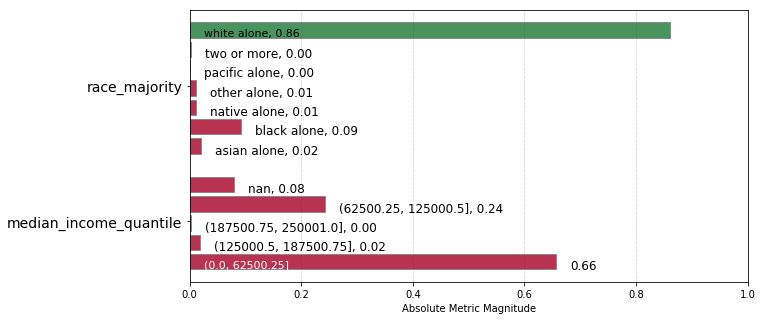

In [106]:
z = aqp.plot_fairness_group(fdf, group_metric='ppr')

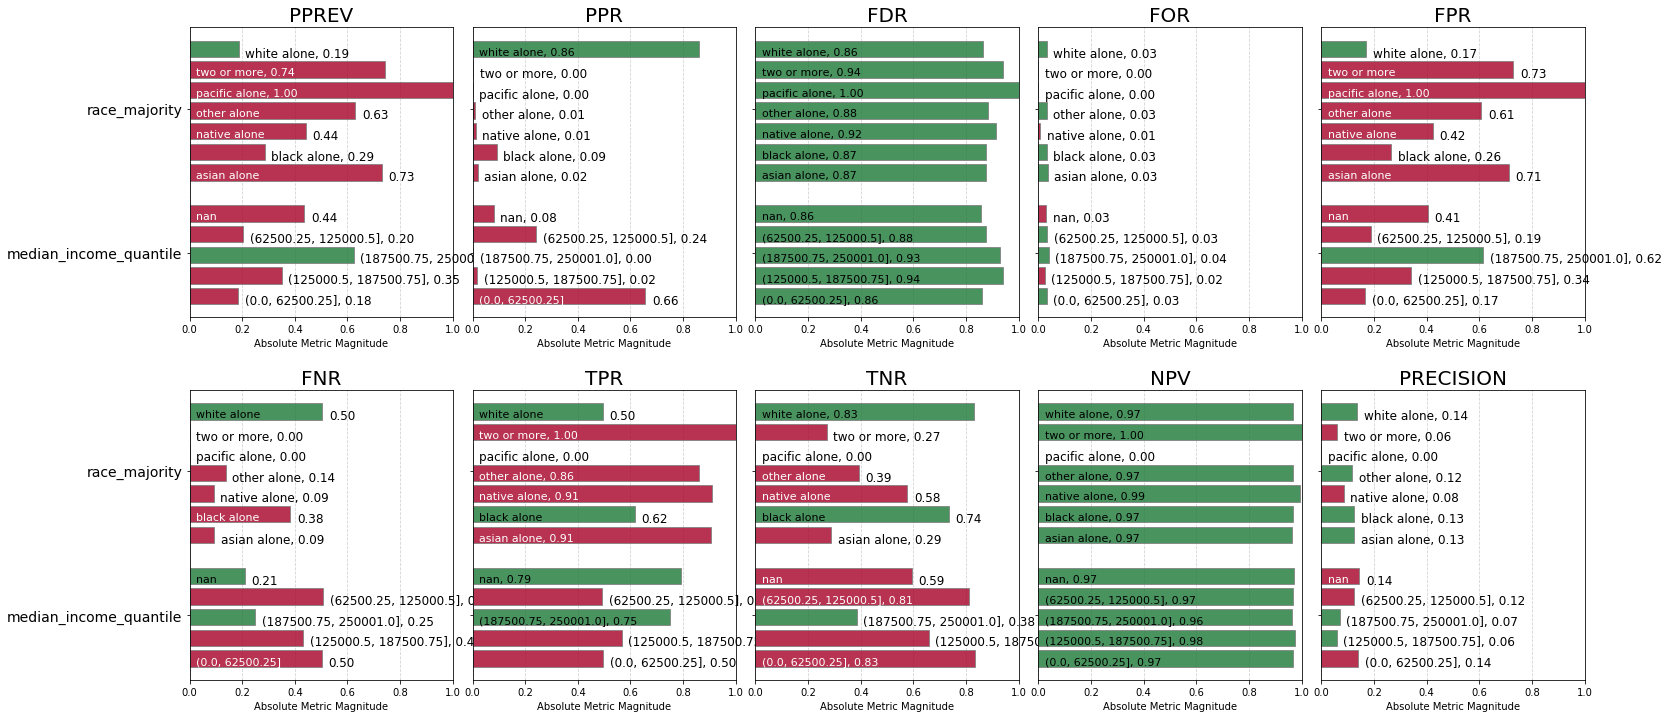

In [107]:
fg = aqp.plot_fairness_group_all(fdf, ncols=5, metrics = "all")

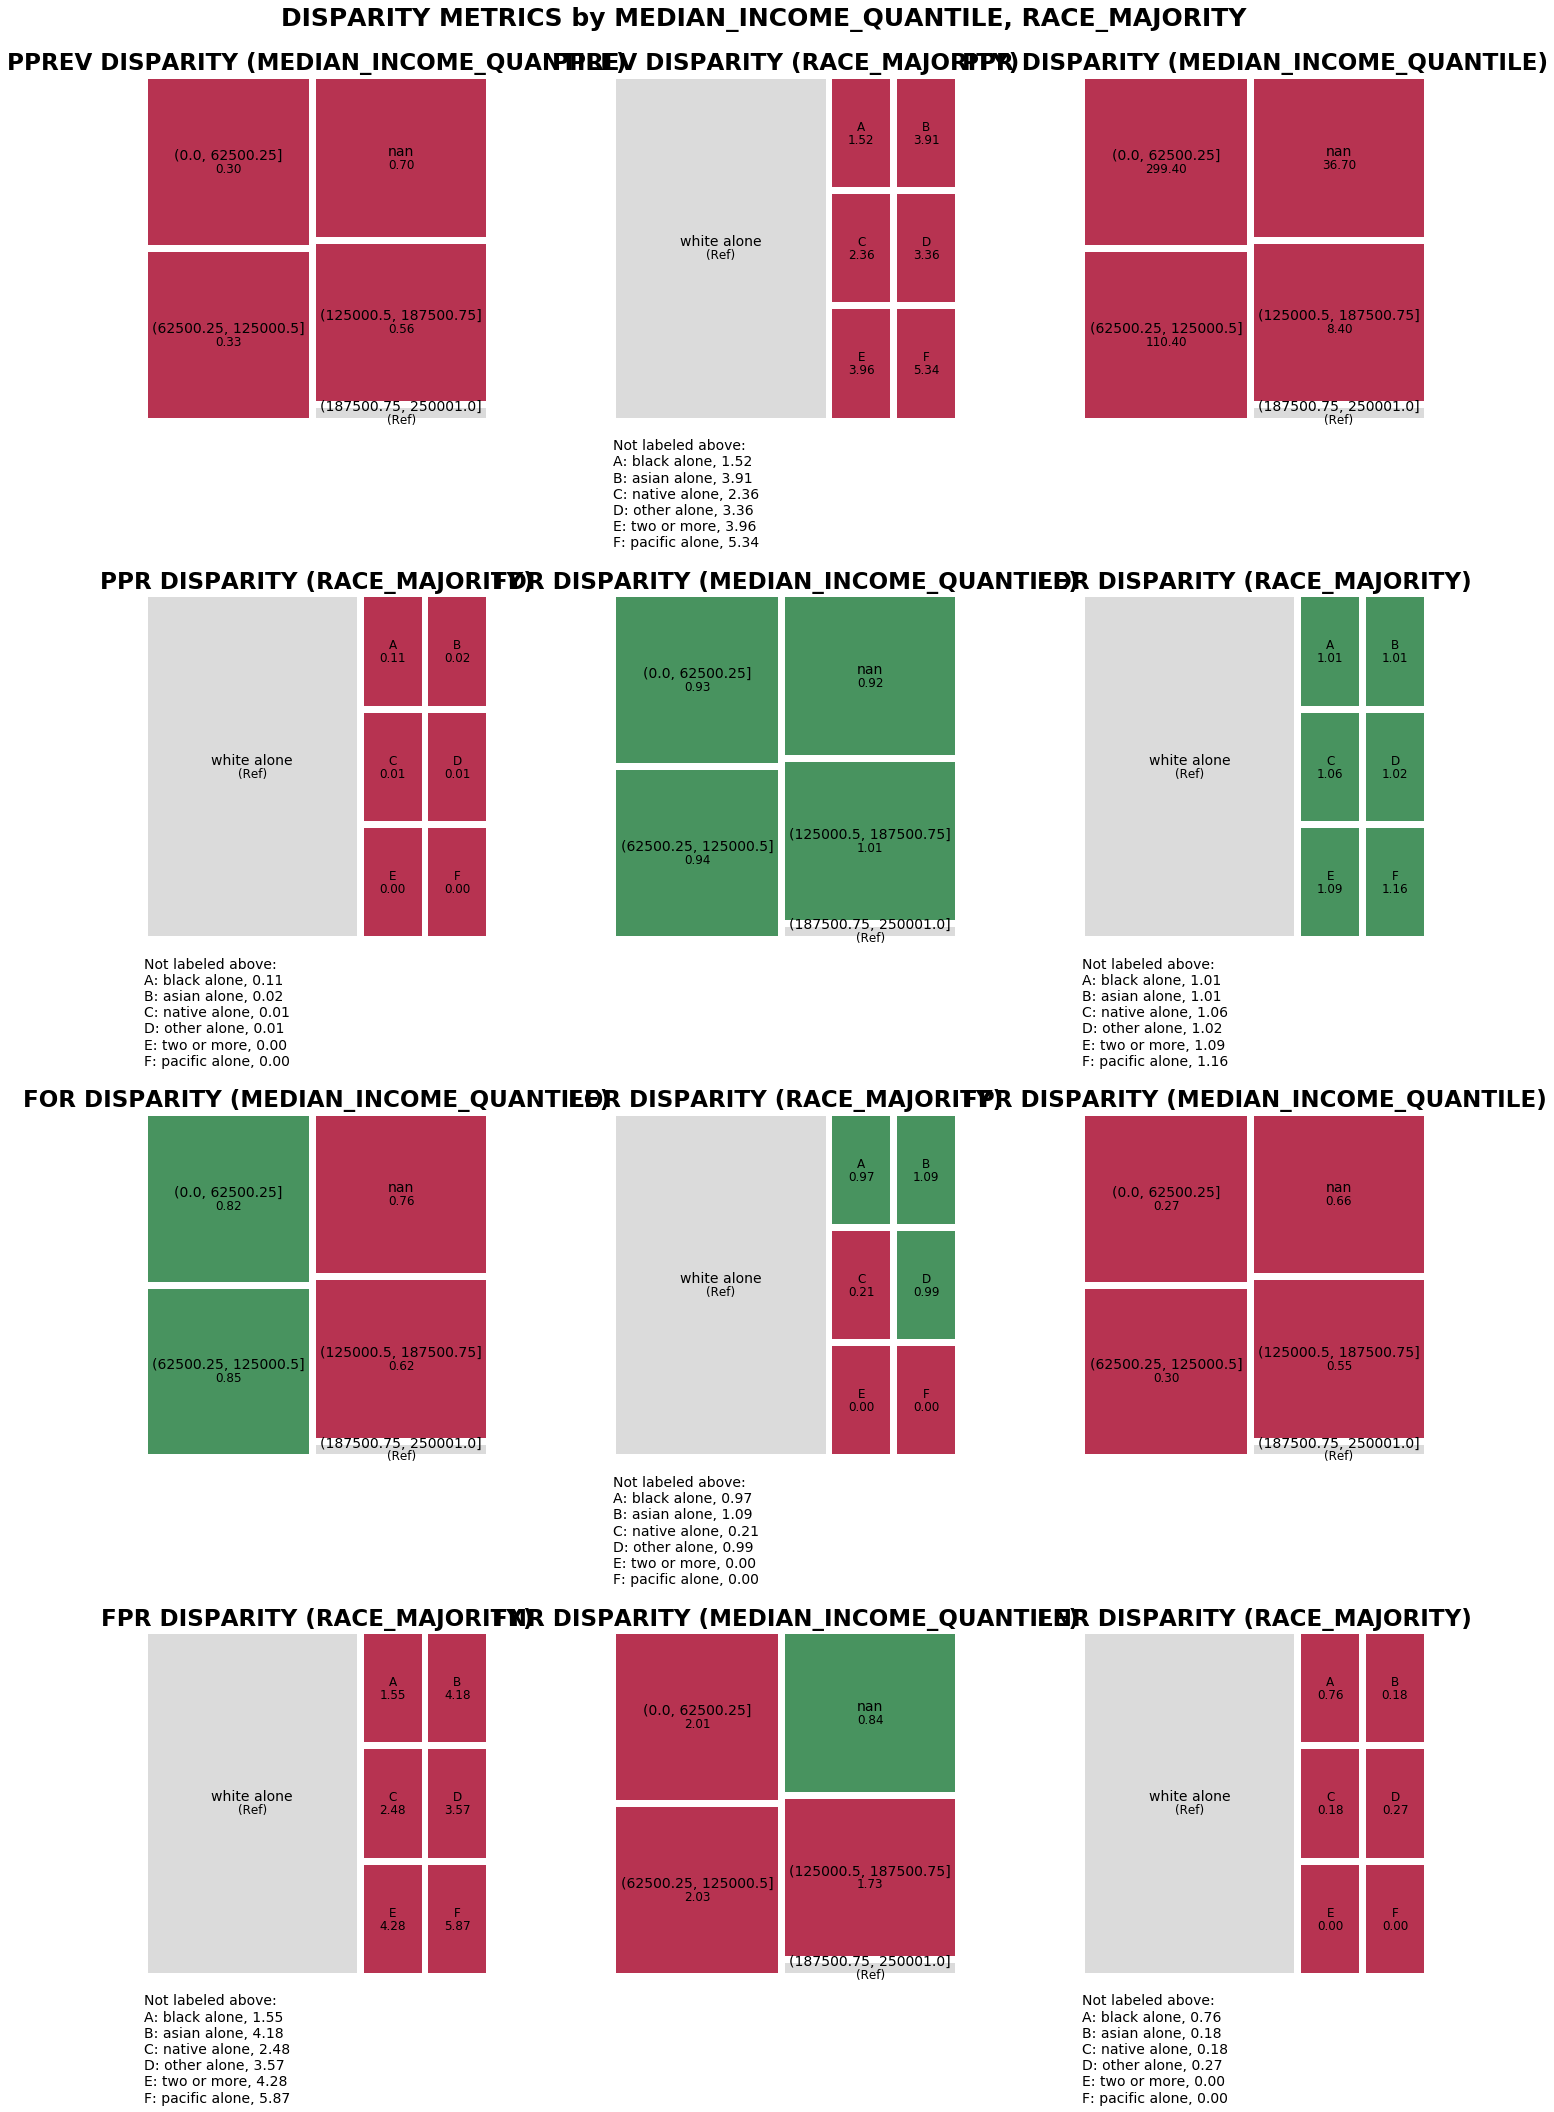

In [108]:
n_tm = aqp.plot_fairness_disparity_all(fdf, attributes=['median_income_quantile', 'race_majority'], 
                                       significance_alpha=0.05)